In [23]:
import seaborn as sns
from sklearn import svm, metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import preprocessing

check completeness of data (NANs)

In [24]:
df = pd.read_csv("SAheart.csv", sep=",", decimal=".")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


Characteristics The ten features are defined as follows:

sbp: systolic blood pressure

tobacco: cumulative tobacco (kg)

ldl: low density lipoprotein cholesterol

adiposity:

famhist: family history of heart disease (Present=1, Absent=0)

typea: type-A behavior

obesity

alcohol: current alcohol consumption

age: age at onset

chd: coronary heart disease (yes=1 or no=0)

In [25]:
df.shape

(462, 10)

In [26]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [27]:
# df.quantile(np.arange(0,1,0.1))

<Axes: ylabel='Density'>

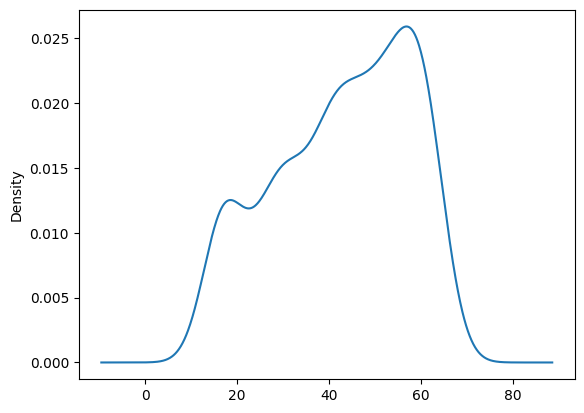

In [28]:
df['age'].plot(kind='density')

<Axes: ylabel='Density'>

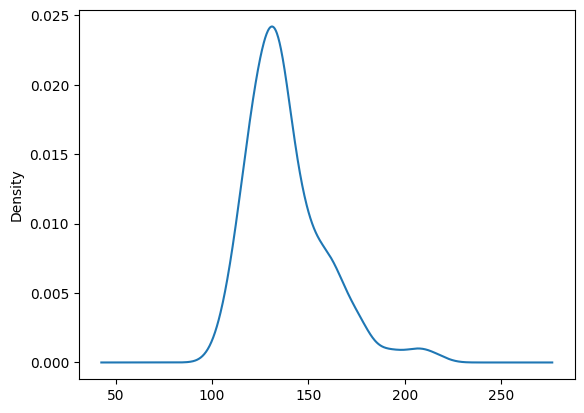

In [29]:
df['sbp'].plot(kind='density')

c:\Users\Ant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


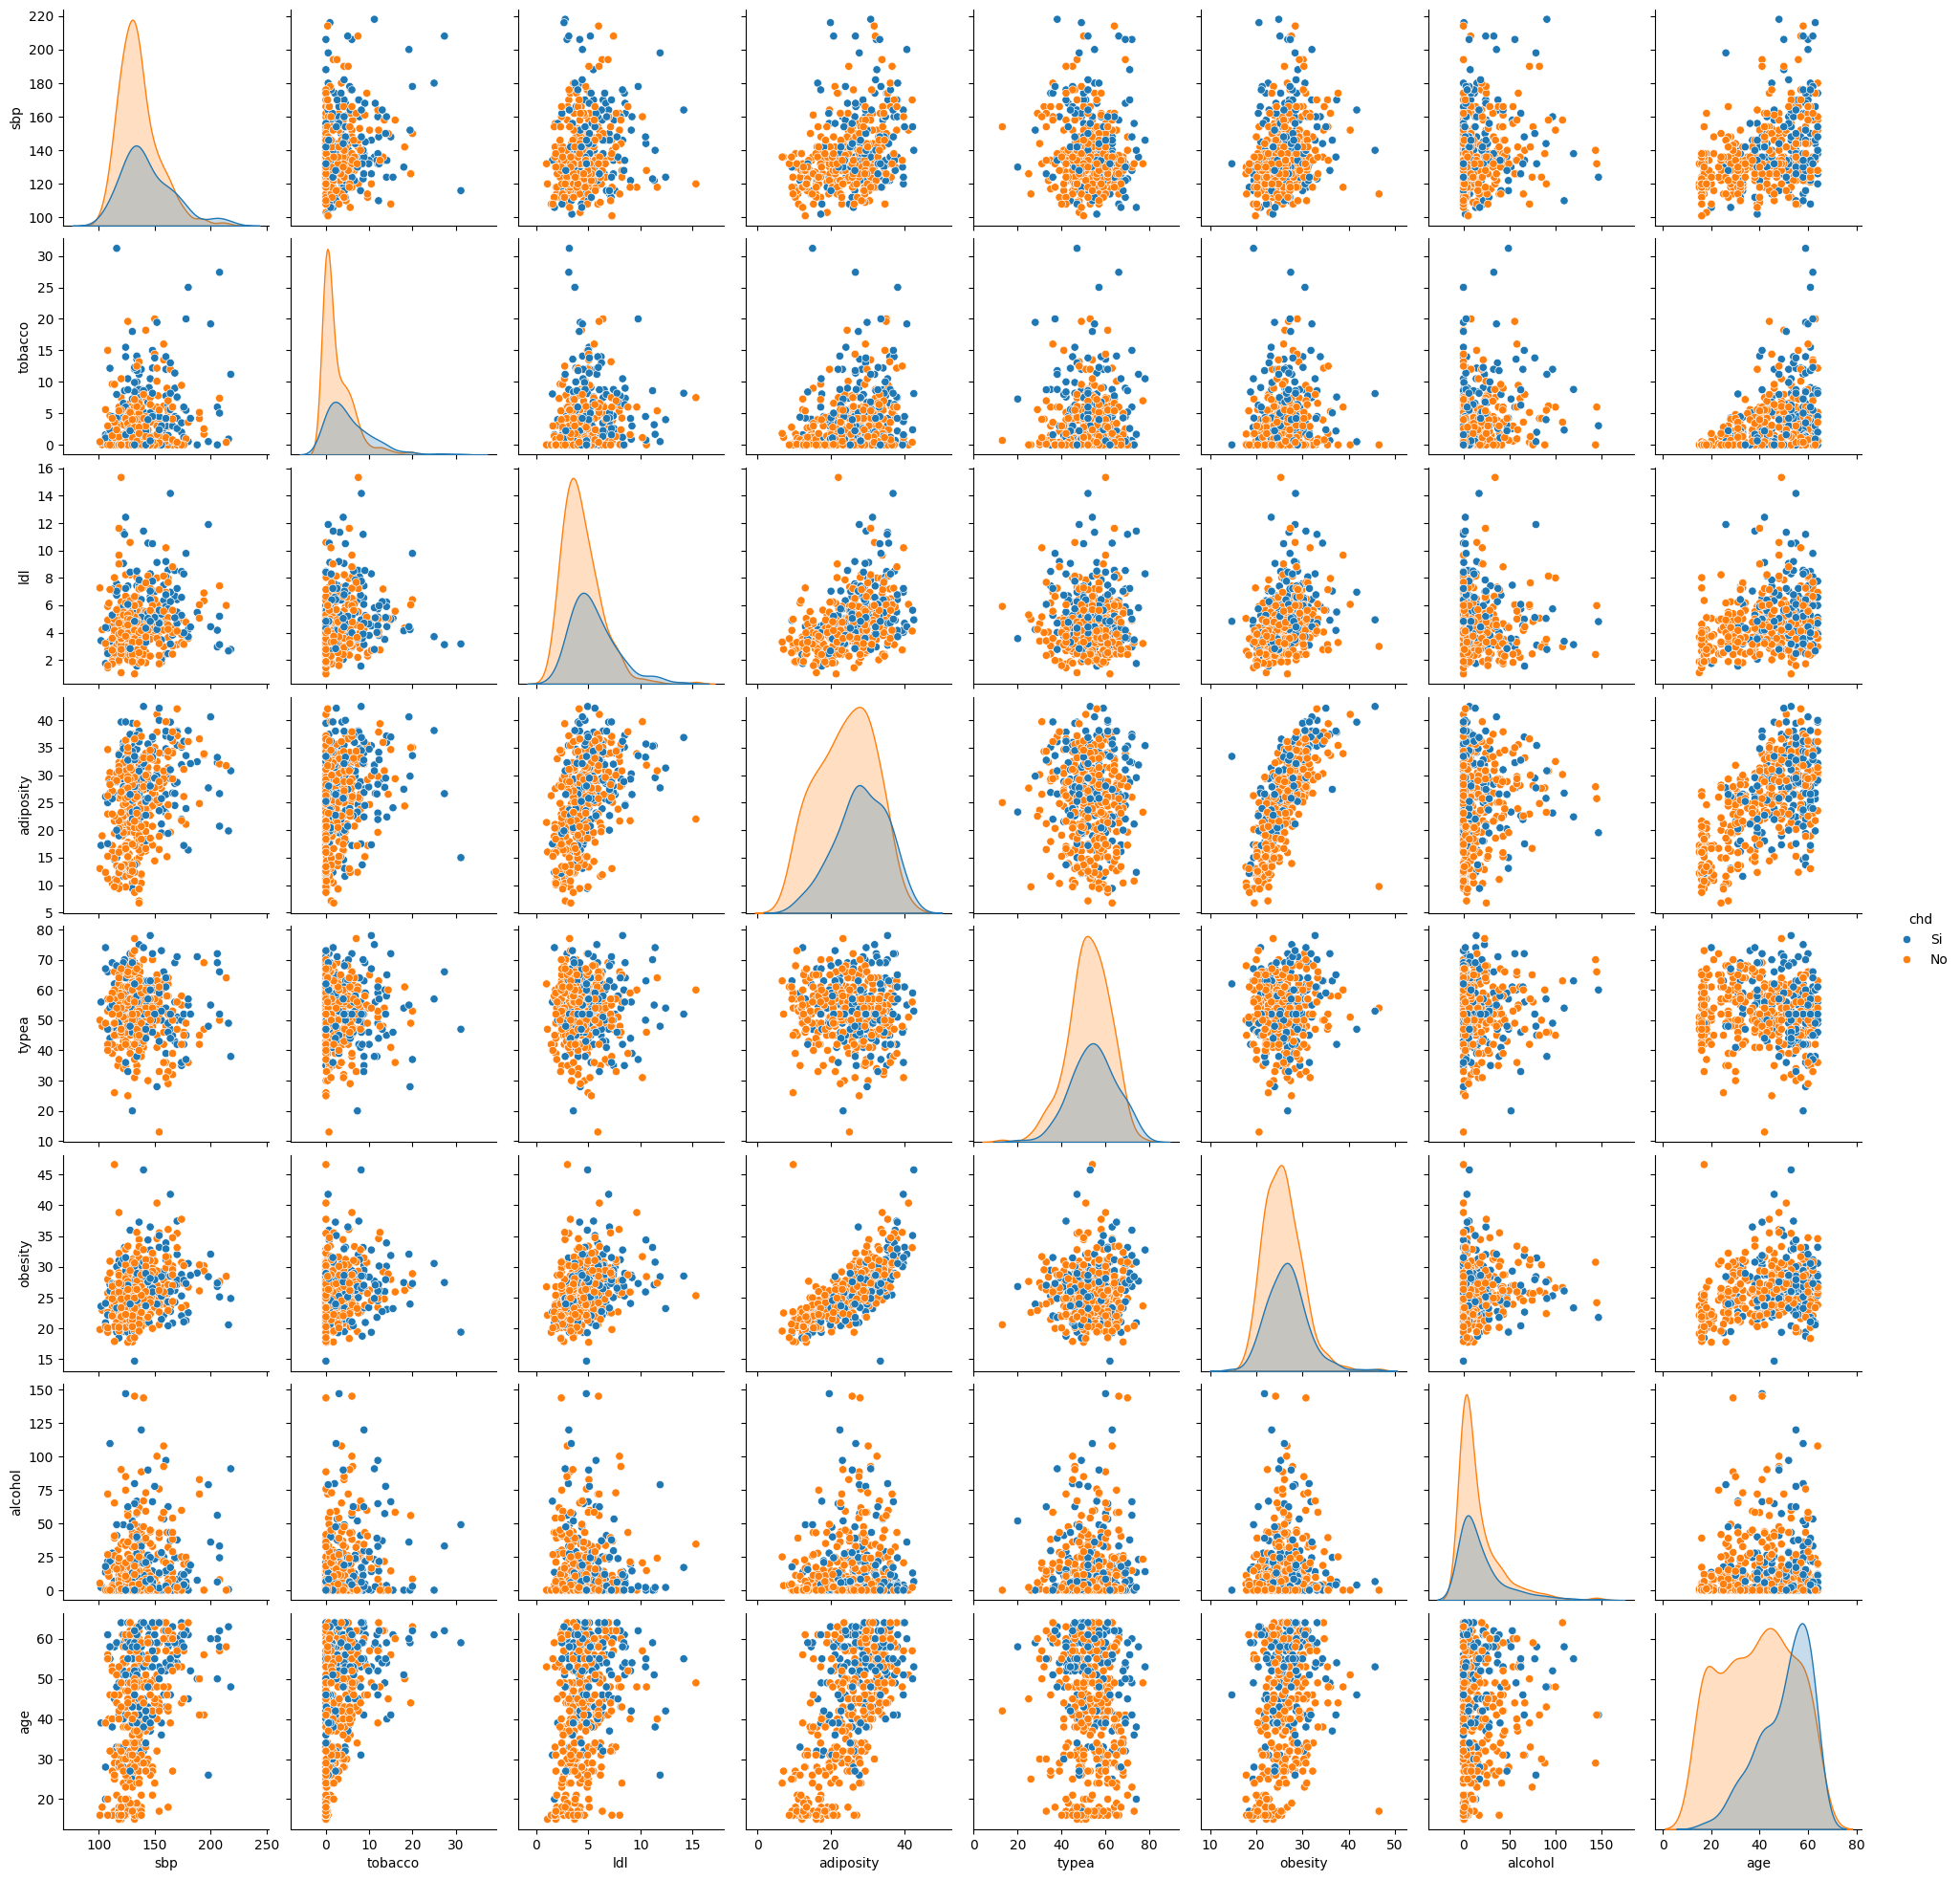

In [30]:
sns.pairplot(df, hue="chd", size=2.5)

In [37]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1.0
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1.0
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0.0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1.0
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1.0


<Axes: >

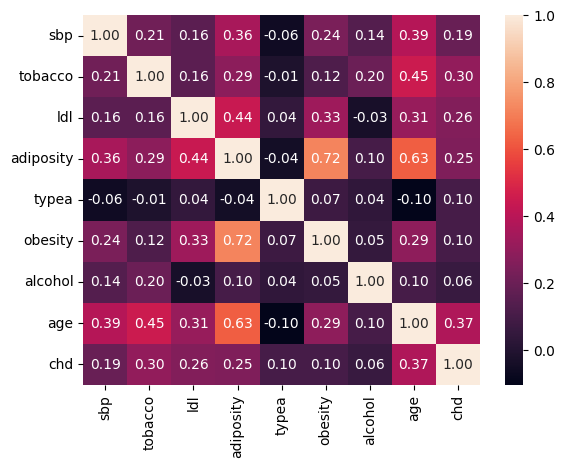

In [41]:
sns.heatmap(df.drop(columns=['famhist']).corr(), annot=True, fmt=".2f")

In [48]:
X = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'age']].to_numpy()

y = df['chd'].to_numpy()

In [49]:
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, shuffle=True, random_state=0
)

In [44]:
X_test.shape

(93, 4)

Fitting ....
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best kernel: poly
Best degree: 4
Best coef: 0.8
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'coef0': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': [1, 2, 3, 4], 'kernel': ['poly']},
             scoring='accuracy', verbose=1):
              precision    recall  f1-score   support

         0.0       0.68      0.90      0.77        61
         1.0       0.50      0.19      0.27        32

    accuracy                           0.66        93
   macro avg       0.59      0.54      0.52        93
weighted avg       0.62      0.66      0.60        93




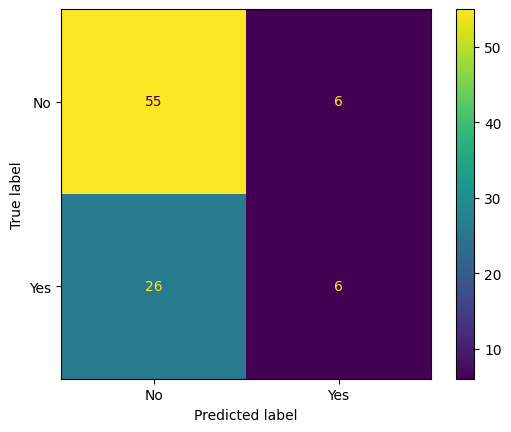

In [50]:
kernel = ['poly',]
degree = [1, 2, 3, 4]
coef0=np.linspace(0, 1, 11)
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "degree": degree, "coef0": coef0}, 
                   verbose=1, n_jobs=-1, scoring="accuracy")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train, y_train)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['degree']))
print('Best coef: {:}'.format(clf.best_params_['coef0']))



# Predict on the test subset
print('Predicting ....')
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()

Fitting ....
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best kernel: poly
Best degree: 1
Best coef: 0.0
Predicting ....
Classification report for classifier GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'coef0': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': [1, 2, 3, 4], 'kernel': ['poly']},
             scoring='accuracy', verbose=1):
              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75        61
         1.0       0.38      0.16      0.22        32

    accuracy                           0.62        93
   macro avg       0.52      0.51      0.49        93
weighted avg       0.57      0.62      0.57        93




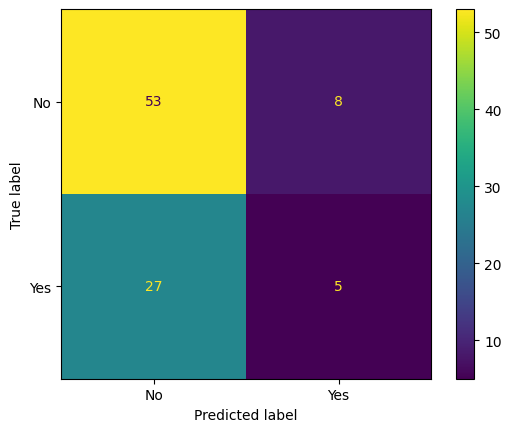

In [46]:
scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

kernel = ['poly',]
degree = [1, 2, 3, 4]
coef0=np.linspace(0, 1, 11)
# Create a classifier: a support vector classifier
clf = GridSearchCV(svm.SVC(), cv=5, param_grid={ "kernel": kernel, "degree": degree, "coef0": coef0}, 
                   verbose=1, n_jobs=-1, scoring="accuracy")

# Learn the train subset
print('Fitting ....')
clf.fit(X_train, y_train)

print('Best kernel: {:}'.format(clf.best_params_['kernel']))
print('Best degree: {:}'.format(clf.best_params_['degree']))
print('Best coef: {:}'.format(clf.best_params_['coef0']))

# Predict the test subset
print('Predicting ....')
predicted = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

# Confusion matrix
cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No', 'Yes'])
disp.plot()
plt.show()